In [26]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Paths to dataset
yes_path = 'Brain MRI Images/yes'
no_path = 'Brain MRI Images/no'

def load_data(data_path, label, size=(128, 128)):
    images = []
    labels = []
    for img_file in os.listdir(data_path):
        img_path = os.path.join(data_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
        img = cv2.resize(img, size)  # Resize to standard size
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load data from both folders
yes_images, yes_labels = load_data(yes_path, label=1)
no_images, no_labels = load_data(no_path, label=0)

# Combine and split data
X = np.concatenate([yes_images, no_images], axis=0)
y = np.concatenate([yes_labels, no_labels], axis=0)

# Normalize and expand dimensions for the model
X = X / 255.0
X = np.expand_dims(X, axis=-1)  # Shape becomes (samples, 128, 128, 1)

# Convert labels to categorical
y = to_categorical(y, num_classes=2)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model(input_shape=(128, 128, 1)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = create_model()

# Print the model summary
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,322 (12.60 MB)

 Trainable params: 3,304,322 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6129 - loss: 0.8047 - val_accuracy: 0.7647 - val_loss: 0.6227
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.7272 - loss: 0.6094 - val_accuracy: 0.8039 - val_loss: 0.4652
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.7656 - loss: 0.5165 - val_accuracy: 0.8039 - val_loss: 0.4146
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.7821 - loss: 0.4937 - val_accuracy: 0.8431 - val_loss: 0.4083
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.8161 - loss: 0.4626 - val_accuracy: 0.8235 - val_loss: 0.3944
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8190 - loss: 0.4276 - val_accuracy: 0.8431 - val_loss: 0.3764
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.7982 - loss: 0.4288 - val_accuracy: 0.7647 - val_loss: 0.4160
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8362 - loss: 0.4249 - val_accuracy: 0.8627 - val_loss:

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Save the trained model
model.save('brain_mri_tumor_classifier.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8591 - loss: 0.3618


Validation Loss: 0.3104307949542999
Validation Accuracy: 0.8823529481887817


In [8]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('brain_mri_tumor_classifier.h5')

# Predict on a new image
def predict_image(image_path, model, size=(128, 128)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size) / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    return "Tumor" if class_idx == 1 else "No Tumor"

# Example usage
image_path = 'Brain MRI Images/yes/Y169.jpg'
result = predict_image(image_path, model)
print(f"Prediction: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Tumor


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


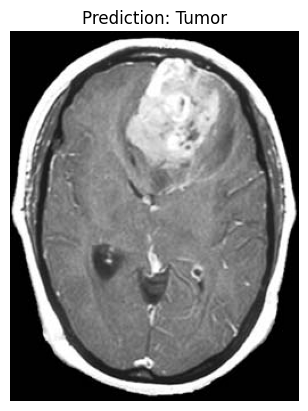

In [9]:
import matplotlib.pyplot as plt

def visualize_prediction(image_path, model):
    result = predict_image(image_path, model)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()

# Visualize
visualize_prediction(image_path, model)

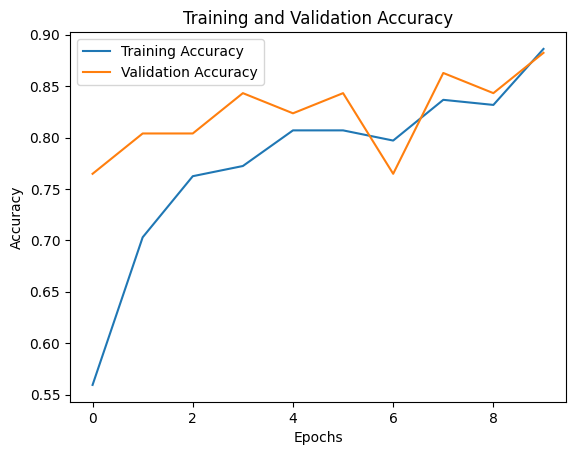

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

NameError: name 'x_val' is not defined